In [26]:
# open csv with pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\marco\Documents\AFC\Diffusion-Models-for-Time-Series\data\real_orders.csv',header=0)
df_ = pd.read_csv(r'C:\Users\marco\Documents\AFC\Diffusion-Models-for-Time-Series\data\generated_orders.csv',header=0)   

In [27]:
class PCA2D(torch.nn.Module):
    def __init__(self, n_components=2):
        super(PCA2D, self).__init__()
        self.n_components = n_components
        self.pca = PCA(n_components=n_components)

    def forward(self, x):
        x = x.values
        x = torch.Tensor(x)
        x = self.pca.fit_transform(x)
        return x

In [29]:
def preprocess_data(df):

    df = df[['PRICE', 'SIZE', 'TYPE', 'BUY_SELL_FLAG', 'ask_price_1', 'ask_size_1', 'bid_price_1', 'bid_size_1']]

    # Standardization on price and size
    df['PRICE'] = (df['PRICE'] - df['PRICE'].mean())/df['PRICE'].std()
    df['SIZE'] = (df['SIZE'] - df['SIZE'].mean())/df['SIZE'].std()
    df['ask_price_1'] = (df['ask_price_1'] - df['ask_price_1'].mean())/df['ask_price_1'].std()
    df['ask_size_1'] = (df['ask_size_1'] - df['ask_size_1'].mean())/df['ask_size_1'].std()
    df['bid_price_1'] = (df['bid_price_1'] - df['bid_price_1'].mean())/df['bid_price_1'].std()
    df['bid_size_1'] = (df['bid_size_1'] - df['bid_size_1'].mean())/df['bid_size_1'].std()

    # One hot encoding for the feature direction
    df = pd.get_dummies(df, columns=['TYPE'])
    df = pd.get_dummies(df, columns=['BUY_SELL_FLAG'])

    return df

C:\Users\marco\AppData\Local\Temp\ipykernel_19992\982374557.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRICE'] = (df['PRICE'] - df['PRICE'].mean())/df['PRICE'].std()
C:\Users\marco\AppData\Local\Temp\ipykernel_19992\982374557.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SIZE'] = (df['SIZE'] - df['SIZE'].mean())/df['SIZE'].std()
C:\Users\marco\AppData\Local\Temp\ipykernel_19992\982374557.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


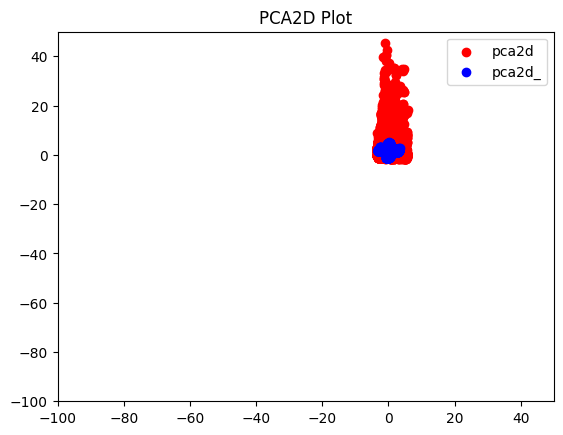

In [30]:
import matplotlib.pyplot as plt

def plot_data(pca2d, pca2d_):
    # Plot pca2d in red
    plt.scatter(pca2d[:, 0], pca2d[:, 1], color='red', label='real')

    # Plot pca2d_ in blue
    plt.scatter(pca2d_[:, 0], pca2d_[:, 1], color='blue', label='generated')

    # Limit x and y axes
    plt.xlim(-100, 50)
    plt.ylim(-100, 50)

    # Add legend and title
    plt.legend()
    plt.title('PCA2D Plot')

    # Show the plot
    #plt.show()

df = preprocess_data(df)
df_ = preprocess_data(df_)

pca2d = PCA2D(n_components=2).forward(df)
pca2d_ = PCA2D(n_components=2).forward(df_)

plot_data(pca2d, pca2d_)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.dates as mdates

comparison_volume_distribution = "real"

def ci(row, n, alpha):
    mean = row['asksize1_mean']
    std = row['asksize1_std']

    margin = st.t.interval(1-alpha, n-1, mean, std/np.sqrt(n))

    return pd.Series(margin, index=['LOWER', 'UPPER'])

def ci_(row, n, alpha):
    mean = row['bidsize1_mean']
    std = row['bidsize1_std']

    margin = st.t.interval(1-alpha, n-1, mean, std/np.sqrt(n))

    return pd.Series(margin, index=['LOWER_', 'UPPER_'])

In [11]:
if comparison_volume_distribution == "real":
    df = pd.read_csv(r"C:\Users\marco\Documents\AFC\Diffusion-Models-for-Time-Series\data\real_orders.csv", header=0)
elif comparison_volume_distribution == "generated":
    df = pd.read_csv(r"C:\Users\marco\Documents\AFC\Diffusion-Models-for-Time-Series\data\generated_orders.csv", header=0)

In [12]:
df.columns

Index(['Unnamed: 0', 'ORDER_ID', 'PRICE', 'SIZE', 'BUY_SELL_FLAG', 'TYPE',
       'ask_price_1', 'ask_size_1', 'bid_price_1', 'bid_size_1', 'MID_PRICE',
       'SPREAD', 'ORDER_VOLUME_IMBALANCE', 'VWAP'],
      dtype='object')

In [13]:
# rename 'Unnamed: 0' con TIME
df.rename(columns={'Unnamed: 0': 'TIME'}, inplace=True)

# new df with only SPREAD and TIME
df_ = df[['TIME', 'ask_size_1', 'bid_size_1']]

df_['TIME'] = pd.to_datetime(df_['TIME'])
df_['TIME'] = df_['TIME'].dt.strftime('%d-%m-%Y %H:%M:%S')

df_grouped = df.groupby(df.index // 500).agg({'TIME': 'first', 'ask_size_1': ['mean','std'], 'bid_size_1': ['mean','std']})

df_grouped.columns = ['TIME', 'asksize1_mean', 'asksize1_std', 'bidsize1_mean', 'bidsize1_std']

C:\Users\marco\AppData\Local\Temp\ipykernel_19356\1339405805.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['TIME'] = pd.to_datetime(df_['TIME'])
C:\Users\marco\AppData\Local\Temp\ipykernel_19356\1339405805.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['TIME'] = df_['TIME'].dt.strftime('%d-%m-%Y %H:%M:%S')


In [14]:
df_grouped

,TIME,asksize1_mean,asksize1_std,bidsize1_mean,bidsize1_std
0,2015-01-30 09:30:00.150460001,282.184000,339.756252,275.574000,666.550237
1,2015-01-30 09:31:06.271263001,189.680000,161.090465,86.404000,103.584905
2,2015-01-30 09:31:34.393499001,197.078000,213.508772,140.408000,110.935002
3,2015-01-30 09:32:38.194896001,145.256000,61.061735,129.050000,87.992801
4,2015-01-30 09:34:15.077549001,128.944000,94.839158,120.024000,71.448115
...,...,...,...,...,...
630,2015-01-30 15:51:25.999669001,371.054000,394.067092,453.720000,630.164776
631,2015-01-30 15:52:24.522855001,609.006000,609.989384,579.478000,806.342134
632,2015-01-30 15:53:43.163300001,1272.806000,1015.480899,672.024000,601.285200
633,2015-01-30 15:54:51.925985001,1926.494000,1640.809762,145.138000,98.078549


In [15]:
alpha = 0.05

n = len(df_grouped)

df_grouped[['LOWER', 'UPPER']] = df_grouped.apply(ci, args=(n, alpha), axis=1)
df_grouped[['LOWER_', 'UPPER_']] = df_grouped.apply(ci_, args=(n, alpha), axis=1)

c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
c:\Users\marco\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a

In [16]:
df_grouped

,TIME,asksize1_mean,asksize1_std,bidsize1_mean,bidsize1_std,LOWER,UPPER,LOWER_,UPPER_
0,2015-01-30 09:30:00.150460001,282.184000,339.756252,275.574000,666.550237,255.707623,308.660377,223.631364,327.516636
1,2015-01-30 09:31:06.271263001,189.680000,161.090465,86.404000,103.584905,177.126612,202.233388,78.331881,94.476119
2,2015-01-30 09:31:34.393499001,197.078000,213.508772,140.408000,110.935002,180.439781,213.716219,131.763106,149.052894
3,2015-01-30 09:32:38.194896001,145.256000,61.061735,129.050000,87.992801,140.497608,150.014392,122.192935,135.907065
4,2015-01-30 09:34:15.077549001,128.944000,94.839158,120.024000,71.448115,121.553415,136.334585,114.456222,125.591778
...,...,...,...,...,...,...,...,...,...
630,2015-01-30 15:51:25.999669001,371.054000,394.067092,453.720000,630.164776,340.345311,401.762689,404.612794,502.827206
631,2015-01-30 15:52:24.522855001,609.006000,609.989384,579.478000,806.342134,561.471013,656.540987,516.641722,642.314278
632,2015-01-30 15:53:43.163300001,1272.806000,1015.480899,672.024000,601.285200,1193.672047,1351.939953,625.167309,718.880691
633,2015-01-30 15:54:51.925985001,1926.494000,1640.809762,145.138000,98.078549,1798.629692,2054.358308,137.494978,152.781022


C:\Users\marco\AppData\Local\Temp\ipykernel_19356\2880948103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['TIME'] = pd.to_datetime(df_f['TIME'])
C:\Users\marco\AppData\Local\Temp\ipykernel_19356\2880948103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['TIME'] = df_f['TIME'].dt.time
C:\Users\marco\AppData\Local\Temp\ipykernel_19356\2880948103.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

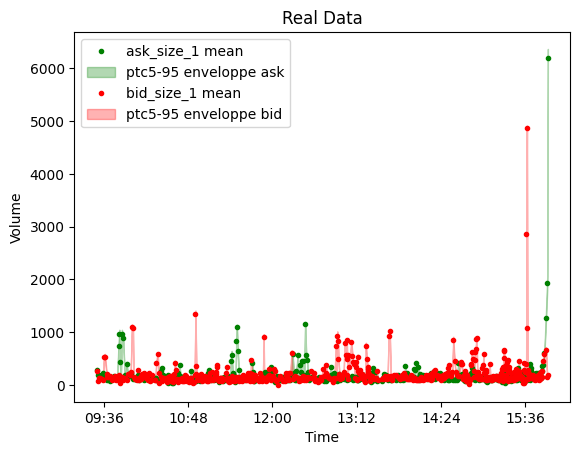

In [17]:
# create df_f with only not NaN values
df_f = df_grouped.dropna()

df_f['TIME'] = pd.to_datetime(df_f['TIME'])

df_f['TIME'] = df_f['TIME'].dt.time

df_f['TIME'] = pd.to_datetime(df_f['TIME'], format='%H:%M:%S.%f')

df_f['TIME'] = pd.to_datetime(df_f['TIME'], format='%H:%M')

df_f['TIME'] = mdates.date2num(df_f['TIME'])

plt.plot(df_f['TIME'], df_f['asksize1_mean'], label='ask_size_1 mean', color='green', marker='o', linestyle='', markersize=3)
plt.fill_between(df_f['TIME'], df_f['LOWER'], df_f['UPPER'], color='green', alpha=0.3, label='ptc5-95 enveloppe ask')

plt.plot(df_f['TIME'], df_f['bidsize1_mean'], label='bid_size_1 mean', color='red', marker='o', linestyle='', markersize=3)
plt.fill_between(df_f['TIME'], df_f['LOWER_'], df_f['UPPER_'], color='red', alpha=0.3, label='ptc5-95 enveloppe bid')

plt.xlabel('Time')
plt.ylabel('Volume')
if comparison_volume_distribution == "real":
    plt.title('Real Data')
if comparison_volume_distribution == "generated":
    plt.title('Generated Data')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.legend()
#plt.show()